In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D,BatchNormalization,AveragePooling2D
from tensorflow.keras.preprocessing import image

In [2]:
! git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 60.86 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [11]:
df=pd.read_csv("Movies-Poster_Dataset/train.csv")

df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df.shape

(7254, 27)

In [17]:
from tqdm import tqdm
import numpy as np
img_width=350
img_height=350

x=[]

for i in tqdm(range(df.shape[0])):
    path="Movies-Poster_Dataset/Images/"+df['Id'][i]+'.jpg'
    img=image.load_img(path,target_size=(img_width,img_height,3))
    img=image.img_to_array(img)
    img=img/255.0
    x.append(img)

100%|██████████| 7254/7254 [00:28<00:00, 258.60it/s]


In [18]:
x=np.array(x)

In [19]:
x.shape

(7254, 350, 350, 3)

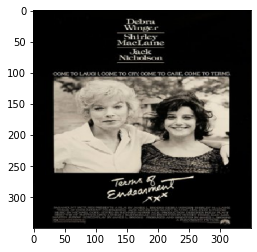

In [20]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [21]:
y=df.drop(['Id','Genre'],axis=1)
y=y.to_numpy()
y.shape

(7254, 25)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [23]:
model=Sequential()

model.add(Conv2D(16,(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25,activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5077, 350, 350, 3) (2177, 350, 350, 3) (5077, 25) (2177, 25)


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Train on 5077 samples, validate on 2177 samples
Epoch 1/5
5077/5077 [==============================] - 293s 58ms/sample - loss: 0.7441 - accuracy: 0.6124 - val_loss: 0.8364 - val_accuracy: 0.5631
Epoch 2/5
5077/5077 [==============================] - 288s 57ms/sample - loss: 0.3571 - accuracy: 0.8711 - val_loss: 0.2677 - val_accuracy: 0.9002
Epoch 3/5
5077/5077 [==============================] - 285s 56ms/sample - loss: 0.2693 - accuracy: 0.9056 - val_loss: 0.2516 - val_accuracy: 0.9071
Epoch 4/5
5077/5077 [==============================] - 288s 57ms/sample - loss: 0.2567 - accuracy: 0.9082 - val_loss: 0.2501 - val_accuracy: 0.9077
Epoch 5/5
5077/5077 [==============================] - 283s 56ms/sample - loss: 0.2493 - accuracy: 0.9102 - val_loss: 0.2485 - val_accuracy: 0.9083
